In [3]:
import deepxde as dde
import numpy as np

아래의 함수를 근사화 해보자
# 문제정의
$$f(x) = x * \sin(5x)$$

# 구현

In [4]:
def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)

계산 도메인 정의

In [5]:
geom = dde.geometry.Interval(-1, 1)

In [6]:
num_train = 16 # 훈련 포인트 16개
num_test = 100 # 테스트용 포인트 100개
data = dde.data.Function(geom, func, num_train, num_test)

In [7]:
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

In [9]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
'compile' took 0.103306 s



2023-10-27 07:16:30.500732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:16:30.501106: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:16:30.501475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:16:30.502099: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:16:30.502136: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not ident

In [10]:
losshistory, train_state = model.train(iterations=10000)

Initializing variables...
Training model...



2023-10-27 07:16:43.466512: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-10-27 07:16:43.513819: I tensorflow/compiler/xla/service/service.cc:170] XLA service 0x7f4658010070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-27 07:16:43.513865: I tensorflow/compiler/xla/service/service.cc:178]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-10-27 07:16:43.567744: I tensorflow/compiler/jit/xla_compilation_cache.cc:478] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-10-27 07:16:43.636677: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:263] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


Step      Train loss    Test loss     Test metric   
0         [2.45e-01]    [2.09e-01]    [1.00e+00]    
1000      [2.46e-04]    [2.38e-04]    [3.38e-02]    
2000      [6.69e-05]    [9.52e-05]    [2.14e-02]    
3000      [2.33e-05]    [4.91e-05]    [1.53e-02]    
4000      [1.14e-05]    [3.88e-05]    [1.36e-02]    
5000      [3.57e-05]    [5.05e-05]    [1.55e-02]    
6000      [1.17e-05]    [3.37e-05]    [1.27e-02]    
7000      [9.09e-06]    [3.14e-05]    [1.23e-02]    
8000      [2.35e-05]    [3.77e-05]    [1.34e-02]    
9000      [7.98e-06]    [2.41e-05]    [1.07e-02]    
10000     [3.51e-06]    [2.01e-05]    [9.82e-03]    

Best model at step 10000:
  train loss: 3.51e-06
  test loss: 2.01e-05
  test metric: [9.82e-03]

'train' took 16.720824 s



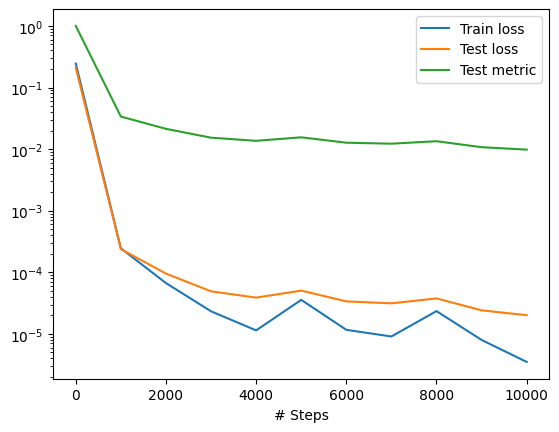

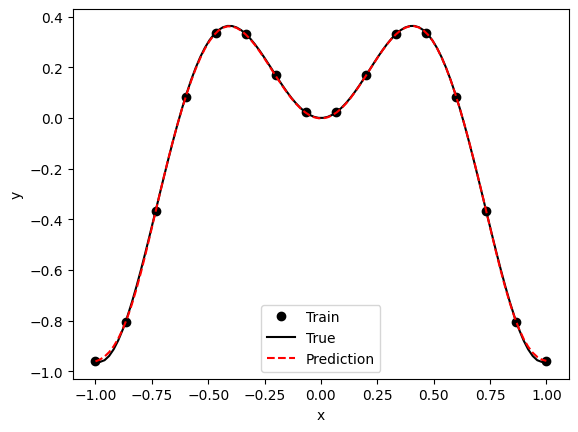

In [13]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

잘 근사화 하는 것을 볼 수 있다.

그렇다면 계산 도메인을 더 크게 늘리면 어떻게 될까?

In [15]:
geom = dde.geometry.Interval(-5, 5)

In [16]:
num_train = 16 # 훈련 포인트 16개
num_test = 100 # 테스트용 포인트 100개
data = dde.data.Function(geom, func, num_train, num_test)

In [19]:
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
Building feed-forward neural network...
'build' took 0.042142 s

'compile' took 0.170498 s



2023-10-27 07:19:25.976915: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:19:25.977298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:19:25.977622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:19:25.978214: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:19:25.978249: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not ident

In [20]:
losshistory, train_state = model.train(iterations=10000)

Initializing variables...
Training model...

Step      Train loss    Test loss     Test metric   
0         [3.18e+00]    [5.32e+00]    [1.13e+00]    
1000      [1.99e+00]    [4.12e+00]    [9.92e-01]    
2000      [1.01e+00]    [3.73e+00]    [9.45e-01]    
3000      [6.70e-01]    [3.89e+00]    [9.65e-01]    
4000      [1.38e-01]    [3.80e+00]    [9.53e-01]    
5000      [2.27e-05]    [3.37e+00]    [8.98e-01]    
6000      [1.56e-05]    [3.42e+00]    [9.05e-01]    
7000      [7.66e-06]    [3.53e+00]    [9.19e-01]    
8000      [9.00e-06]    [3.58e+00]    [9.26e-01]    
9000      [5.81e-05]    [3.62e+00]    [9.30e-01]    
10000     [2.49e-04]    [3.62e+00]    [9.31e-01]    

Best model at step 7000:
  train loss: 7.66e-06
  test loss: 3.53e+00
  test metric: [9.19e-01]

'train' took 14.521307 s



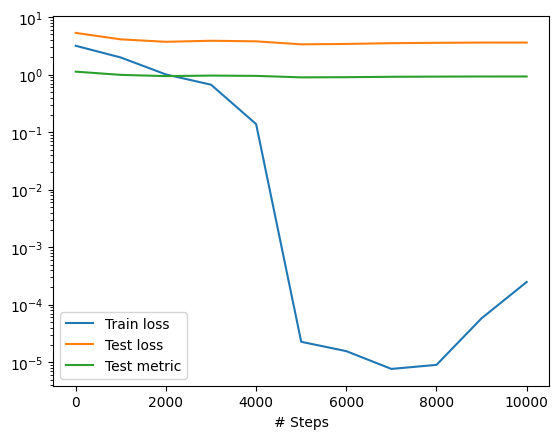

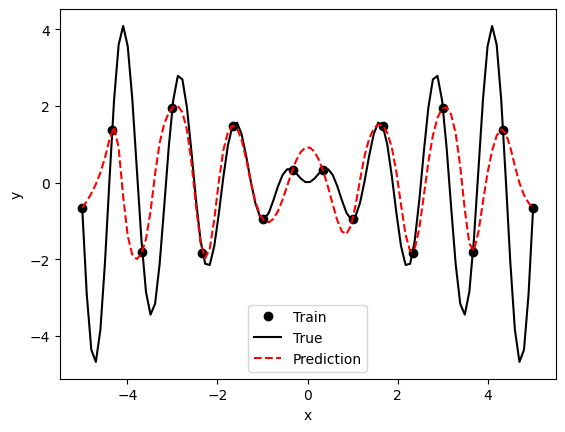

In [21]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

계산 도메인은 5배 늘었지만 데이터수가 늘어나지 않았기 때문에 정확도가 굉장히 떨어지는 것을 볼 수 있다.

그렇다면 5배 늘어난 도메인에서 데이터가 늘어남에 따라 정확도가 어떻게 변화는지 관찰해보자

Compiling model...
Building feed-forward neural network...
'build' took 0.045629 s

'compile' took 0.190425 s

Initializing variables...


/usr/local/lib/python3.8/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2023-10-27 07:23:43.868508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:23:43.868940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:23:43.869257: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:23:43.869785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.92e+00]    [4.64e+00]    [1.05e+00]    
1000      [3.36e+00]    [3.91e+00]    [9.67e-01]    
2000      [6.64e-02]    [1.91e+00]    [6.76e-01]    
3000      [6.39e-02]    [1.93e+00]    [6.79e-01]    
4000      [6.37e-02]    [1.90e+00]    [6.74e-01]    
5000      [3.45e-02]    [1.45e+00]    [5.89e-01]    
6000      [3.40e-02]    [1.45e+00]    [5.90e-01]    
7000      [3.40e-02]    [1.47e+00]    [5.93e-01]    
8000      [3.40e-02]    [1.48e+00]    [5.95e-01]    
9000      [3.40e-02]    [1.49e+00]    [5.98e-01]    
10000     [3.40e-02]    [1.51e+00]    [6.02e-01]    

Best model at step 10000:
  train loss: 3.40e-02
  test loss: 1.51e+00
  test metric: [6.02e-01]

'train' took 14.359728 s



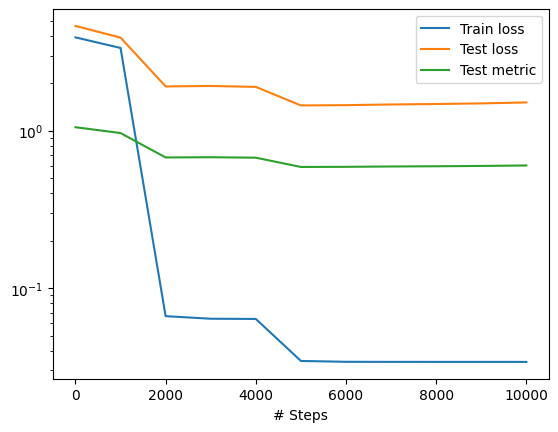

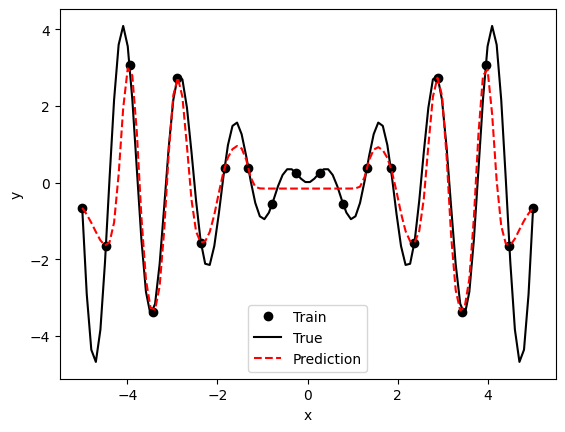

Compiling model...
Building feed-forward neural network...
'build' took 0.039023 s

'compile' took 0.184713 s

Initializing variables...


2023-10-27 07:23:58.761194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:23:58.761542: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:23:58.761852: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:23:58.762370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:23:58.762409: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not ident

Training model...

Step      Train loss    Test loss     Test metric   
0         [4.13e+00]    [4.19e+00]    [1.00e+00]    
1000      [9.34e-01]    [8.68e-01]    [4.56e-01]    
2000      [2.24e-02]    [2.80e-02]    [8.19e-02]    
3000      [8.30e-03]    [2.04e-02]    [6.99e-02]    
4000      [6.92e-03]    [1.87e-02]    [6.69e-02]    
5000      [6.04e-03]    [1.76e-02]    [6.49e-02]    
6000      [4.77e-03]    [1.61e-02]    [6.20e-02]    
7000      [3.87e-03]    [1.46e-02]    [5.91e-02]    
8000      [1.69e-03]    [1.38e-02]    [5.75e-02]    
9000      [8.64e-04]    [1.31e-02]    [5.59e-02]    
10000     [8.91e-04]    [1.31e-02]    [5.61e-02]    

Best model at step 9000:
  train loss: 8.64e-04
  test loss: 1.31e-02
  test metric: [5.59e-02]

'train' took 15.146159 s



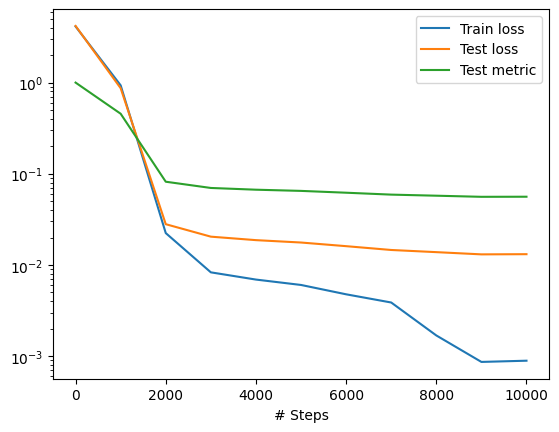

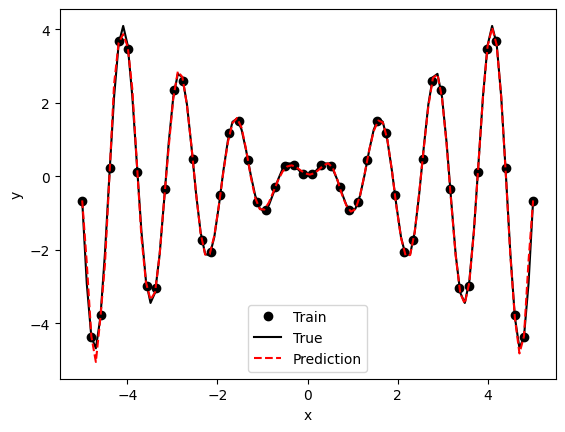

Compiling model...
Building feed-forward neural network...
'build' took 0.039753 s

'compile' took 0.212852 s



2023-10-27 07:24:14.489635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:14.490073: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:14.490488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:14.491001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:14.491032: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not ident

Initializing variables...
Training model...

Step      Train loss    Test loss     Test metric   
0         [4.32e+00]    [4.32e+00]    [1.02e+00]    
1000      [1.97e+00]    [1.97e+00]    [6.87e-01]    
2000      [1.57e-01]    [1.57e-01]    [1.94e-01]    
3000      [1.16e-01]    [1.16e-01]    [1.66e-01]    
4000      [2.23e-02]    [2.23e-02]    [7.31e-02]    
5000      [3.25e-03]    [3.25e-03]    [2.79e-02]    
6000      [6.90e-04]    [6.90e-04]    [1.28e-02]    
7000      [3.55e-04]    [3.55e-04]    [9.22e-03]    
8000      [2.52e-04]    [2.52e-04]    [7.77e-03]    
9000      [1.94e-04]    [1.94e-04]    [6.81e-03]    
10000     [3.98e-04]    [3.98e-04]    [9.76e-03]    

Best model at step 9000:
  train loss: 1.94e-04
  test loss: 1.94e-04
  test metric: [6.81e-03]

'train' took 13.709669 s



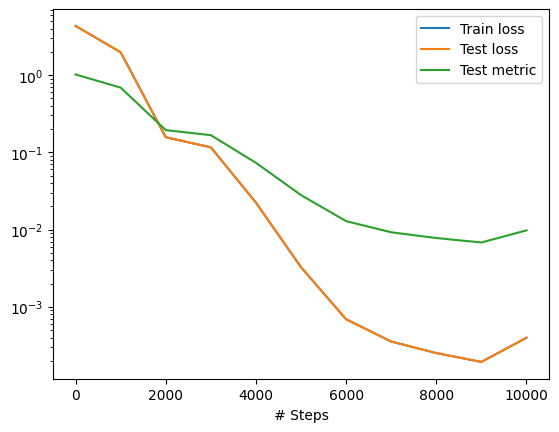

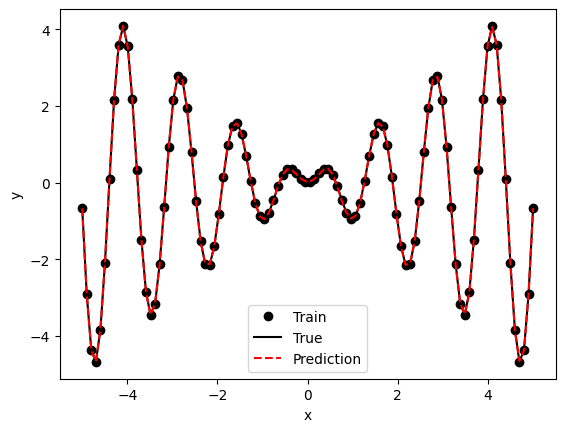

Compiling model...
Building feed-forward neural network...
'build' took 0.038896 s

'compile' took 0.209235 s



2023-10-27 07:24:28.824956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:28.825507: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:28.825929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:28.826500: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:28.826540: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not ident

Initializing variables...
Training model...

Step      Train loss    Test loss     Test metric   
0         [4.24e+00]    [4.22e+00]    [1.00e+00]    
1000      [1.00e+00]    [1.04e+00]    [4.99e-01]    
2000      [3.55e-01]    [3.59e-01]    [2.93e-01]    
3000      [2.10e-01]    [2.09e-01]    [2.24e-01]    
4000      [2.06e-01]    [2.05e-01]    [2.22e-01]    
5000      [1.52e-01]    [1.51e-01]    [1.90e-01]    
6000      [5.72e-02]    [5.69e-02]    [1.17e-01]    
7000      [5.51e-02]    [5.48e-02]    [1.14e-01]    
8000      [5.47e-02]    [5.44e-02]    [1.14e-01]    
9000      [5.42e-02]    [5.39e-02]    [1.14e-01]    
10000     [5.43e-02]    [5.40e-02]    [1.14e-01]    

Best model at step 9000:
  train loss: 5.42e-02
  test loss: 5.39e-02
  test metric: [1.14e-01]

'train' took 14.575281 s



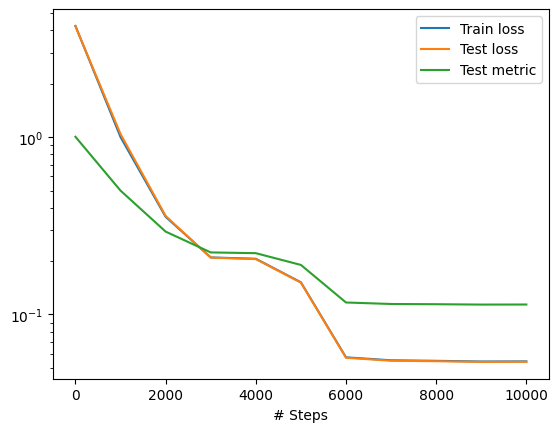

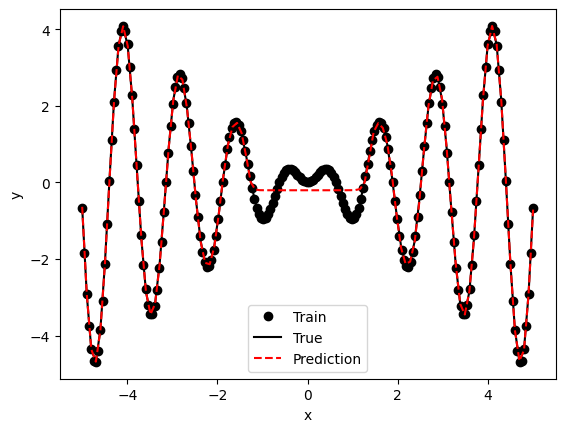

Compiling model...
Building feed-forward neural network...
'build' took 0.042344 s

'compile' took 0.231550 s



2023-10-27 07:24:43.982785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:43.983175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:43.983455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:43.983910: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:24:43.983945: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not ident

Initializing variables...
Training model...

Step      Train loss    Test loss     Test metric   
0         [4.22e+00]    [4.19e+00]    [1.00e+00]    
1000      [7.68e-01]    [7.89e-01]    [4.35e-01]    
2000      [3.09e-01]    [3.09e-01]    [2.72e-01]    
3000      [8.11e-02]    [8.17e-02]    [1.40e-01]    
4000      [8.86e-03]    [8.99e-03]    [4.64e-02]    
5000      [7.28e-03]    [7.27e-03]    [4.17e-02]    
6000      [6.19e-03]    [6.16e-03]    [3.84e-02]    
7000      [5.15e-03]    [5.11e-03]    [3.50e-02]    
8000      [4.23e-03]    [4.20e-03]    [3.17e-02]    
9000      [3.80e-03]    [3.82e-03]    [3.02e-02]    
10000     [3.47e-03]    [3.51e-03]    [2.90e-02]    

Best model at step 10000:
  train loss: 3.47e-03
  test loss: 3.51e-03
  test metric: [2.90e-02]

'train' took 15.632197 s



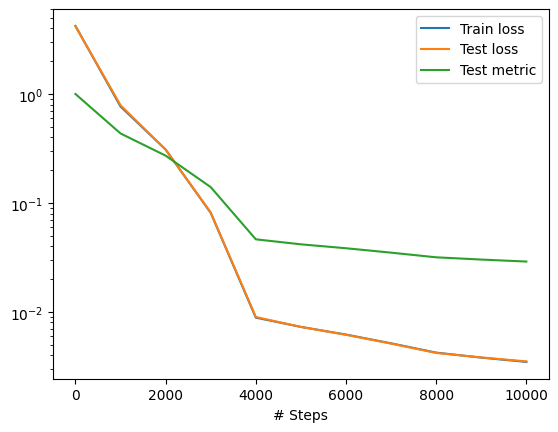

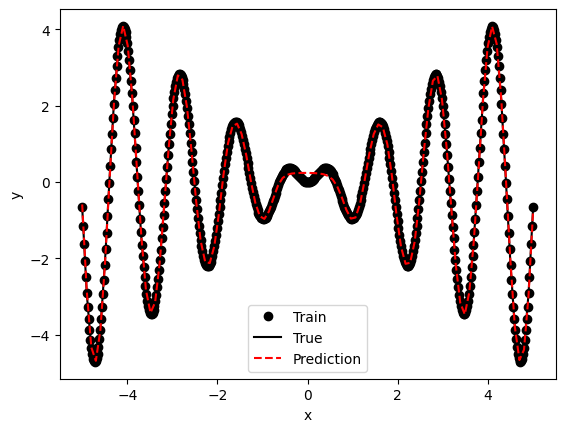

Compiling model...
Building feed-forward neural network...
'build' took 0.047691 s



2023-10-27 07:25:00.255179: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:25:00.255638: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:25:00.256163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:25:00.256782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 07:25:00.256821: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not ident

'compile' took 0.271016 s

Initializing variables...
Training model...

Step      Train loss    Test loss     Test metric   
0         [5.41e+00]    [5.38e+00]    [1.13e+00]    
1000      [2.03e+00]    [2.15e+00]    [7.17e-01]    
2000      [2.13e-01]    [2.72e-01]    [2.55e-01]    
3000      [9.07e-03]    [1.53e-02]    [6.06e-02]    
4000      [3.83e-03]    [4.52e-03]    [3.29e-02]    
5000      [2.84e-03]    [3.27e-03]    [2.80e-02]    
6000      [2.49e-03]    [2.83e-03]    [2.60e-02]    
7000      [2.25e-03]    [2.44e-03]    [2.42e-02]    
8000      [2.44e-03]    [2.57e-03]    [2.48e-02]    
9000      [2.29e-03]    [2.36e-03]    [2.38e-02]    
10000     [2.11e-03]    [2.18e-03]    [2.29e-02]    

Best model at step 10000:
  train loss: 2.11e-03
  test loss: 2.18e-03
  test metric: [2.29e-02]

'train' took 15.310619 s



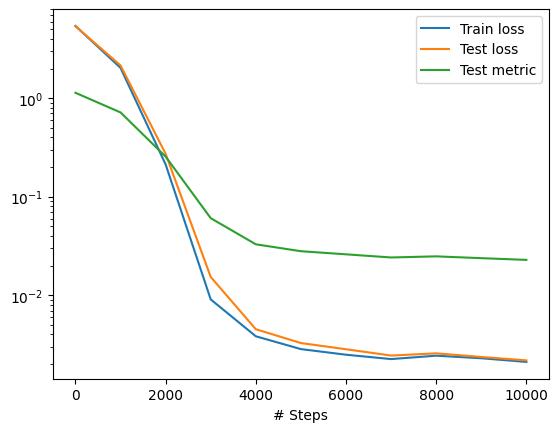

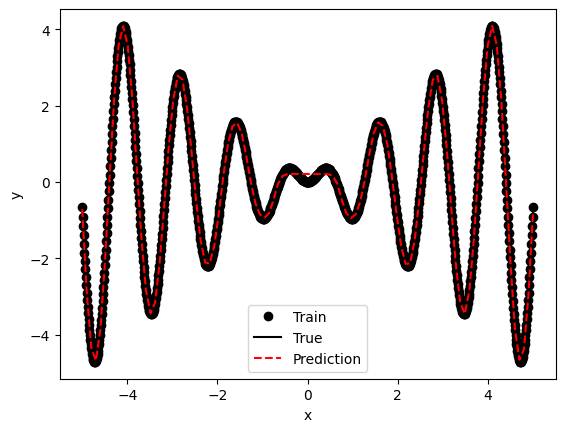

In [23]:
history_list = []
for data_count in [20, 50, 100, 200, 500, 1000]:
    num_train = data_count
    num_test = 100 # 테스트용 포인트 100개
    data = dde.data.Function(geom, func, num_train, num_test)
    activation = "tanh"
    initializer = "Glorot uniform"
    net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)
    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    losshistory, train_state = model.train(iterations=10000)
    history_list.append(losshistory)
    dde.saveplot(losshistory, train_state, issave=False, isplot=True)